In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = "retina"

import numpy as np
import xarray as xr
import sys,os,glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

sys.path.insert(0,'../../../')

from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150

# Simulation PDFs

We made time averaged joint PDFs from all 7 models (see :ref:`model_table`) at all 4 heights available. This tutorial demonstrates how to download, read-in, and handle simulation PDFs using `TigressSimLoader` class. More comphrensive examples can be found at :ref:`paper_figures`.

In [3]:
import twind

In [4]:
# read in simulated PDF
sim = twind.TigressSimLoader('R4','H')
sim.load(download=True)

In [5]:
# since TigressSimLoader is a child class of TigressWindModel, 
# this itself can be used to build model PDFs
# if the simulation pdf is passed in set_axes() method, 
# it will make axes identical to the simulation PDF
sim.set_axes(pdf=sim.simpdf,verbose=True)
modelpdf=sim.build_model()

Setting up from simulation PDF...
  u in (0.0,3.5) with du = 0.02
  w in (0.0,3.5) with dw = 0.02
  Sigma_SFR = 0.0917, ZISM = 0.0302
  Mpdf : cool=0.867 int=0.046 hot=0.085 total=0.998
  ppdf : cool=0.381 int=0.057 hot=0.560 total=0.999
  Epdf : cool=0.044 int=0.018 hot=0.938 total=1.000
  Zpdf : cool=0.824 int=0.047 hot=0.127 total=0.998


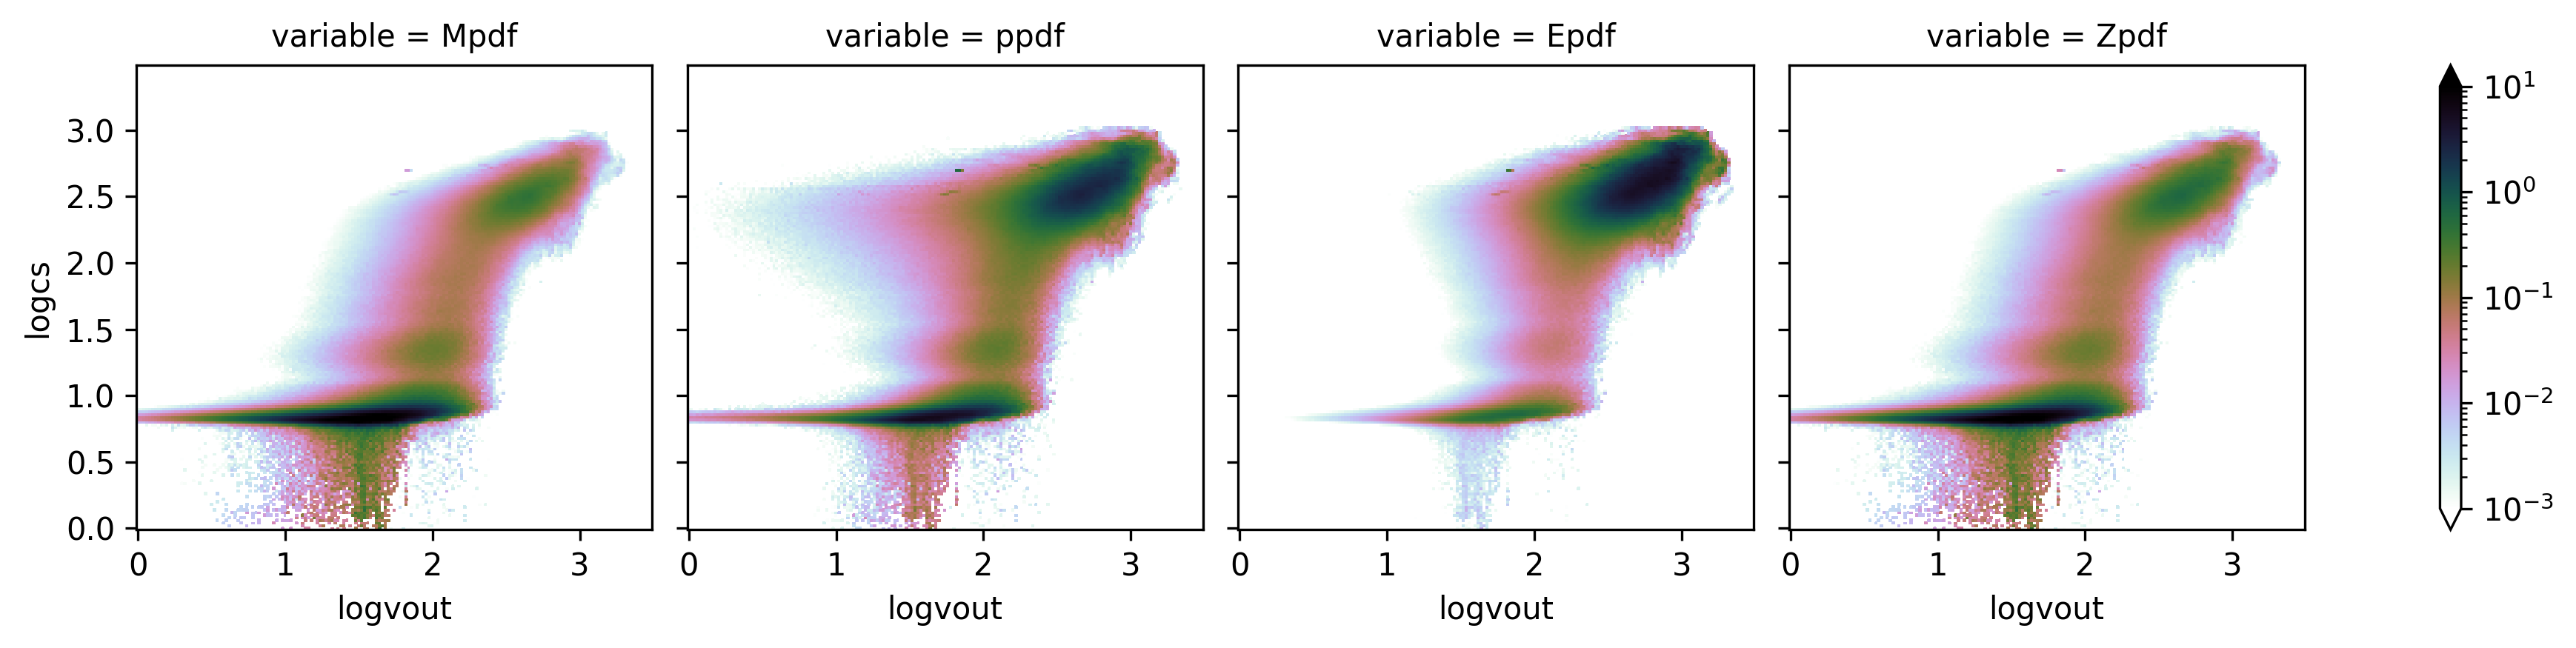

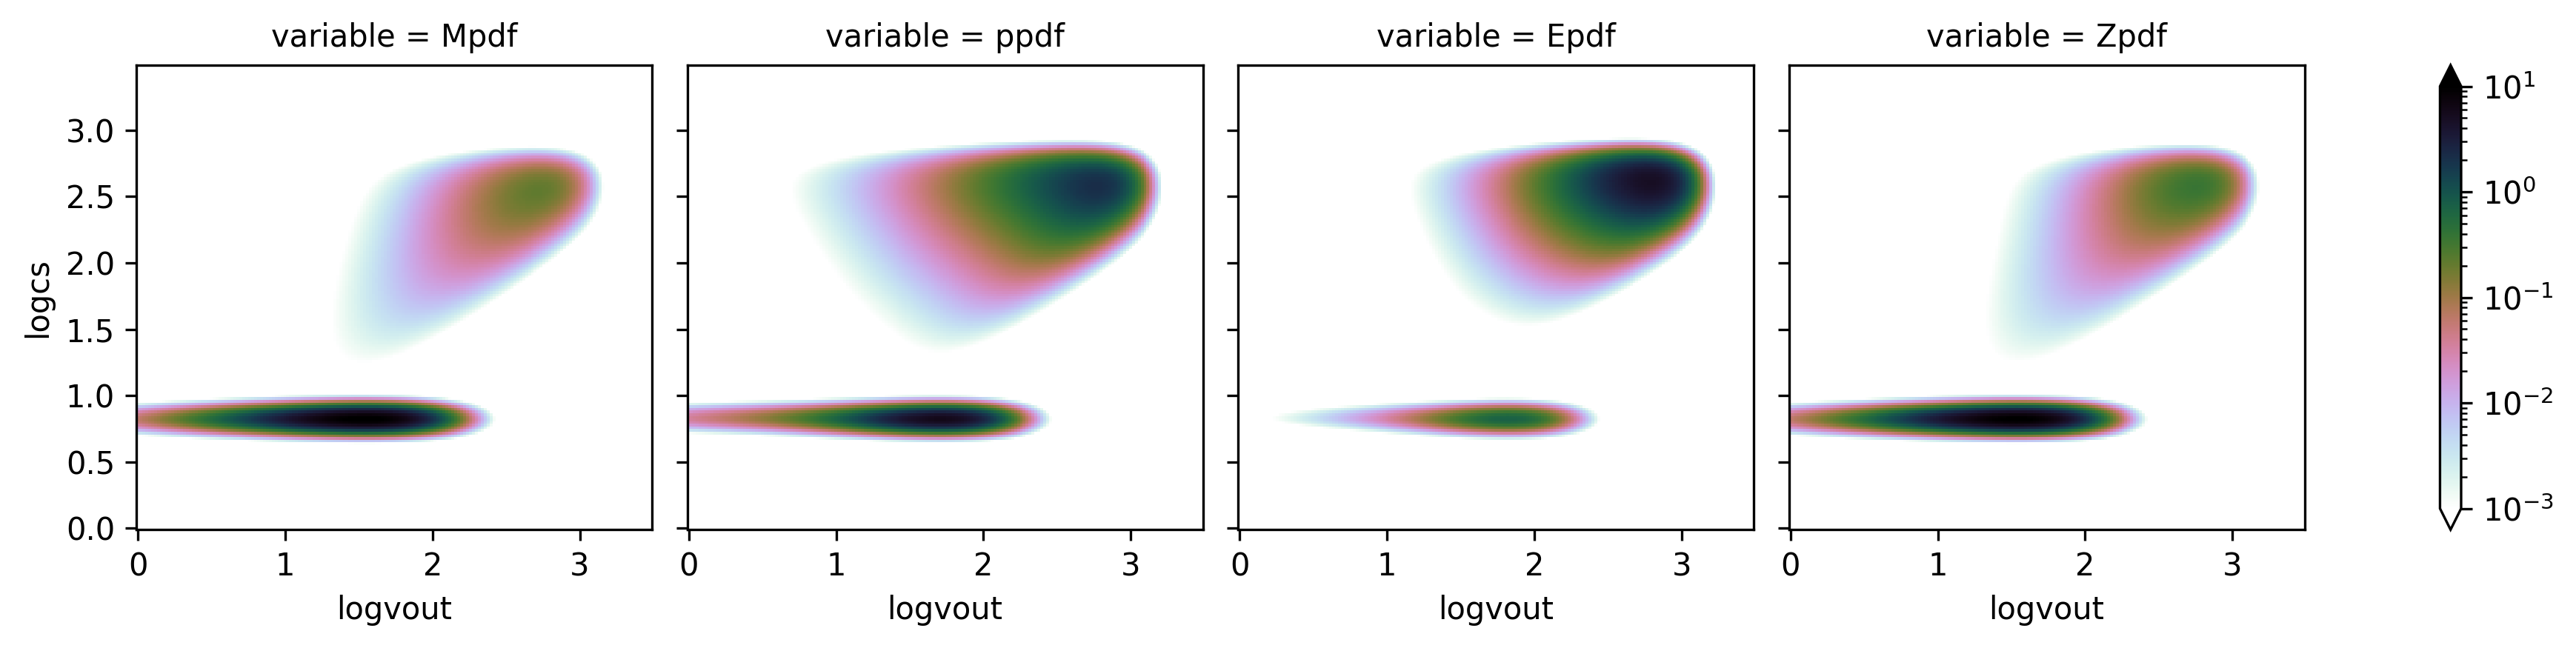

In [6]:
# show all PDFs from R4 simulation
simpdf = sim.simpdf
simpdf[['Mpdf','ppdf','Epdf','Zpdf']].to_array().plot(col='variable',
    norm=LogNorm(vmin=1.e-3,vmax=10),
    cmap=plt.cm.cubehelix_r)
# this can be compared with model PDF
modelpdf[['Mpdf','ppdf','Epdf','Zpdf']].to_array().plot(col='variable',
    norm=LogNorm(vmin=1.e-3,vmax=10),
    cmap=plt.cm.cubehelix_r)